+ http://www.acgeospatial.co.uk/julia-prt2/  
+ http://www.acgeospatial.co.uk/julia-prt3/  
+ https://yeesian.com/ArchGDAL.jl/dev/quickstart/

In [120]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.add("FileIO")

mkpath("downloads")
mkpath("out")

using ArchGDAL; const AG = ArchGDAL

 Activating environment at `C:\Users\i am\Documents\GitHub\stage-Machine-learning\prisma\hdf5\Project.toml`
  Resolving package versions...
No Changes to `C:\Users\i am\Documents\GitHub\stage-Machine-learning\prisma\hdf5\Project.toml`
No Changes to `C:\Users\i am\Documents\GitHub\stage-Machine-learning\prisma\hdf5\Manifest.toml`


ArchGDAL

In [121]:
using HDF5
include("../../code/julia/HDF5filesDict.jl")

Main.HDF5fd

In [122]:
include("../../code/julia/faux.jl")

Main.faux

In [123]:
include("../../code/julia/eos_get_geoloc.jl")

Main.eos_get_geoloc

In [124]:
using Plots

# @GeoTiff

https://en.wikipedia.org/wiki/GeoTIFF  

https://en.wikipedia.org/wiki/TIFF  

https://en.wikipedia.org/wiki/Raster_graphics

tl;dr: abbiamo un raster (matrice di pixel) con metadati (numero bande, geolocation(lat, lon)), all interno di tiff, salvati tramite ArchGDAL -> GDAL, con i dati letti dai hdf prisma(cubi vnir+swir)

dove troviamo dati geoloc in prod l2d?  
* matrice lat: hdf5\swaths\PRS_L2d_(h per hypersp cube, p per panchromatic)CO\geolocation fields\latitude  
* matrice lon: hdf5\swaths\PRS_L2d_(h per hypersp cube, p per panchromatic)CO\geolocation fields\longitude

con le due mat abbiamo latitudine/longitudine di ogni pixel del raster

dove troviamo il cubo? (raster x bande)  
* cubo vnir:  hdf5\swaths\PRS_L2d_hCO\data fields\vnir_cube  
* cubo swir:  hdf5\swaths\PRS_L2d_hCO\data fields\swir_cube  


In [125]:
openfiles = HDF5fd.filesDict()
# 1 apriamo file hdf5
f = HDF5fd.open(openfiles, "data/PRS_L2D_STD_20200627102334_20200627102339_0001.he5", "r")



HDF5 data file: data/PRS_L2D_STD_20200627102334_20200627102339_0001.he5

In [126]:
# 2 prendiamo raster di una banda

cube = faux.getData(f, "HDFEOS/SWATHS/PRS_L2D_HCO/Data Fields/SWIR_Cube");

In [127]:
# cubo X,band,Y, vogliamo una matrice X,Y per una banda
band = cube[:,2,:]

1235×1209 Array{UInt16,2}:
 0x0000  0x0000  0x0000  0x0000  0x0000  …  0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000  …  0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000  …  0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x0000
 0x0000  0x0000  0x0000  0x0000  0x0000     0x0000  0x0000  0x0000  0x000

In [128]:
#nb: sparse
count(!iszero,band)/(length(band))

0.3627764773644361

In [129]:
# 3 prendiamo matrici lat e lon, risoluzione pixel
#lat = faux.getData(file, "HDFEOS/SWATHS/PRS_L2D_HCO/Geolocation Fields/Latitude")
#lon = faux.getData(file, "HDFEOS/SWATHS/PRS_L2D_HCO/Geolocation Fields/Longitude")
proc_lev = faux.getAttr(f, "Processing_Level")
source = "HCO"
wvl = "SWIR"
geo = eos_get_geoloc.get_geoloc(f,proc_lev,source,wvl,nothing)

(xmin = 687262.5f0, xmax = 724282.5f0, ymin = 5.0014375f6, ymax = 5.0376775f6, proj_code = "32", proj_name = "UTM", proj_epsg = 0x00007f78, lat = [45.4675018677777 45.46723206852843 … 45.141843233239825 45.141573415856456; 45.46749382122203 45.46722402204805 … 45.14183527703462 45.14156545972568; … ; 45.456604182122106 45.45633448480904 … 45.13106788878385 45.130798172187184; 45.45659455109057 45.456324853867564 … 45.131058365853185 45.130788649345575], lon = [11.395537484420938 11.39552604977535 … 11.381853006932946 11.381841765873645; 11.395920918848592 11.395909482377022 … 11.382234256061437 11.382223013206996; … ; 11.868180974889752 11.868167291088827 … 11.851804737203516 11.851791284950515; 11.868564189861035 11.868550504237941 … 11.852185771415503 11.852172317371068])

In [130]:
#possiamo chiudere il file
HDF5fd.closeall(openfiles)

chiuso 1 file


In [131]:
# 4 creiamo parte metadati, per raster servono coord del pixel all angolo in alto a sinistra, risoluzione di un pixel e origine definita tramite crs
ulpixel = (x=geo.xmin,y=geo.ymax)
width = length(geo.lat[:,1])
height = length(geo.lat[1,:])
#calcoliamo risoluzione come distanza tra 
res = (geo.xmin - geo.xmax)/width# \approx (geo.ymin - geo.ymax)/height

#archgdal prende geoloc come array:
gtf = [
    ulpixel.x,#distanza in mt sull asse delle x del pixel topleft dall origine
    res,
    0,#per rotazione
    ulpixel.y,#distanza in mt sull asse delle y del pixel topleft dall origine
    0,
    -res
]
gtf = convert(Array{Float64,1}, gtf)
# creiamo stringa crs
crs = AG.toWKT(AG.importEPSG(geo.proj_epsg))

"PROJCS[\"WGS 84 / UTM zone 32N\",GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378137,298.257223563,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0,AUTHORITY[\"EPSG\",\"8901\"]],UNIT[\"degree\",0.0174532925199433,AUTHORITY[\"EPSG\",\"9122\"]],AUTHORITY[\"EPSG\",\"4326\"]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"latitude_of_origin\",0],PARAMETER[\"central_meridian\",9],PARAMETER[\"scale_factor\",0.9996],PARAMETER[\"false_easting\",500000],PARAMETER[\"false_northing\",0],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]],AXIS[\"Easting\",EAST],AXIS[\"Northing\",NORTH],AUTHORITY[\"EPSG\",\"32632\"]]"

In [132]:
# 5 scriviamo tutto
AG.create(
    "out/temporary.tif",
    driver = AG.getdriver("GTiff"),
    width=width,
    height=height,
    nbands=1,
    dtype=UInt16
) do dataset
    AG.write!(dataset, band, 1)
    AG.setgeotransform!(dataset, gtf)
    AG.setproj!(dataset, crs)
end

NULL Dataset

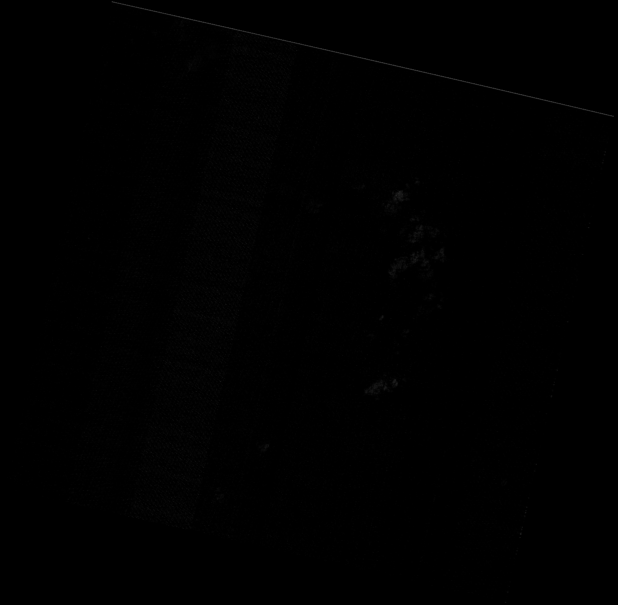

In [133]:
using Images, FileIO
# specify the path to your local image file
img_path = "out/temporary.tif"
img = load(img_path)

In [134]:
#yay

In [135]:
include("../../code/julia/eos_PANdemo.jl")

Main.eos_demo

out/mytiff.tif già esistente
deleting out/mytiff.tif
creato out/mytiff.tif
chiuso 1 file


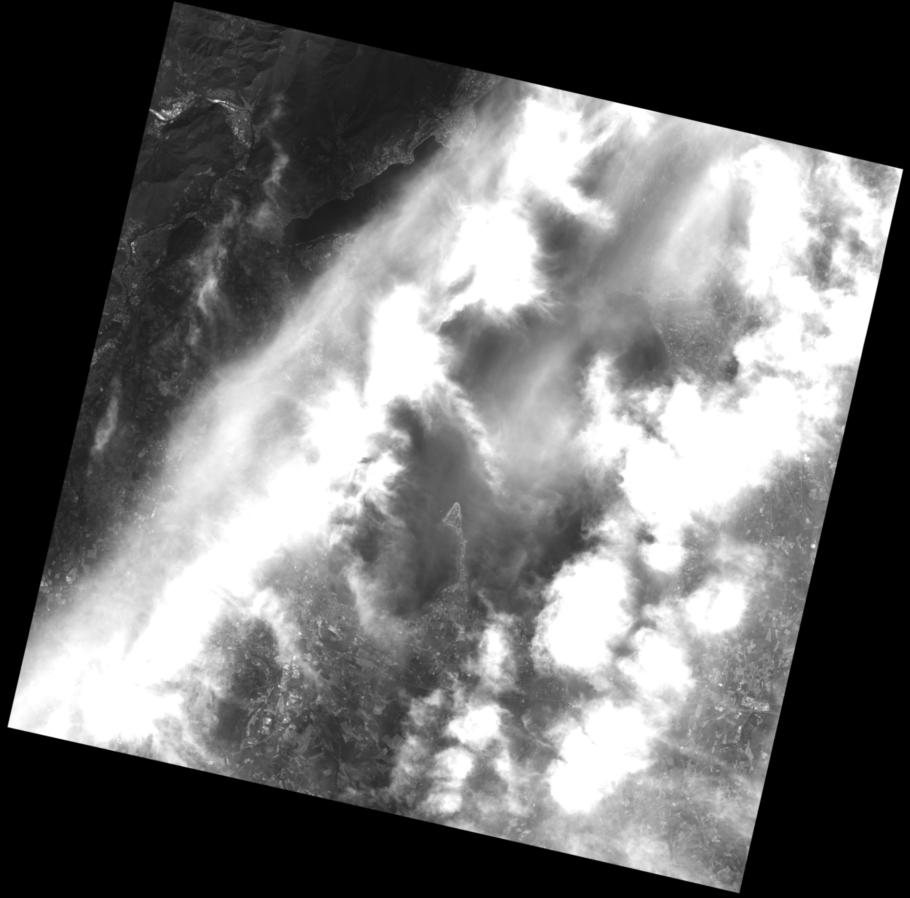

In [136]:
#piccola demo per far vedere i pancromatici di prodotti livello 2d

hdf = "data/PRS_L2D_STD_20190911102308_20190911102313_0001.he5"
img_path = "out/mytiff.tif"
eos_demo.demo(hdf,img_path,true)
img = load(img_path)

In [137]:
# nuvole??????

In [138]:
rm(img_path)